## <center> Assignment 4. Sarcasm detection with logistic regression
    
We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 
<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

# Detección de sarcasmo
Para este ejercicio vas a utilizar el dataset del paper [A Large Self-Annotated Corpus for Sarcasm](https://arxiv.org/abs/1704.05579), con un millón de comentarios de Reddit, etiquetados como sarcásticos o no sarcásticos. Se pide:
1. Si hubiese missings, eliminalos


In [2]:
# some necessary imports
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
os.getcwd()

'c:\\Users\\pilar\\Edition_Jun2020\\Repositorios_GitHub\\activity_bootcamp_jun2020\\2_Machine_Learning\\semana_31\\día_2'

In [1]:
path = "../../../../DataSets/sarcasm/"
file_train = "train-balanced-sarcasm.csv"
file_train = "test-unbalanced.csv"
os.listdir(path)

['test-unbalanced.csv',
 'train-balanced-sarc.csv.gz',
 'train-balanced-sarcasm.csv']

In [4]:
path = "../../../../"
train_df = pd.read_csv('C:\\Users\\pilar\\Edition_Jun2020\\Repositorios_GitHub\\DataSets\\sarcasm\\train-balanced-sarcasm.csv')

In [5]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


Some comments are missing, so we drop the corresponding rows.

In [6]:
train_df.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [7]:
train_df.shape

(1010826, 10)

In [8]:
train_df.dropna(inplace=True)

In [9]:
train_df['comments'] = train_df['comment'].str.replace('[^\w\s]','') 

train_df.drop(['comment'],inplace=True, axis=1)

In [10]:
train_df = train_df[['label',
 'comments',
 'author',
 'subreddit',
 'score',
 'ups',
 'downs',
 'date',
 'created_utc',
 'parent_comment']]

In [11]:
train_df.head()

,label,comments,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,They were underdogs earlier today but since Gr...,Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,This meme isnt funny none of the new york nigg...,icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010773 non-null  int64 
 1   comments        1010773 non-null  object
 2   author          1010773 non-null  object
 3   subreddit       1010773 non-null  object
 4   score           1010773 non-null  int64 
 5   ups             1010773 non-null  int64 
 6   downs           1010773 non-null  int64 
 7   date            1010773 non-null  object
 8   created_utc     1010773 non-null  object
 9   parent_comment  1010773 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


We notice that the dataset is indeed balanced

In [13]:
train_df['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

In [14]:
train_texts, valid_texts, y_train, y_valid = train_test_split(train_df['comments'], train_df['label'], random_state=17)

In [15]:
print("X_train: ", train_texts.shape)
print("y_train: ", y_train.shape)
print("X_test: ", valid_texts.shape)
print("y_test: ", y_valid.shape)

X_train:  (758079,)
y_train:  (758079,)
X_test:  (252694,)
y_test:  (252694,)


## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions

In [16]:
import plotly.graph_objs as go
import plotly.offline as py

In [17]:
train_df['label'].sum()

505368

In [18]:
(train_df['label'].sum()/train_df.shape[0])*100

49.99816971763195

<AxesSubplot:xlabel='label', ylabel='count'>

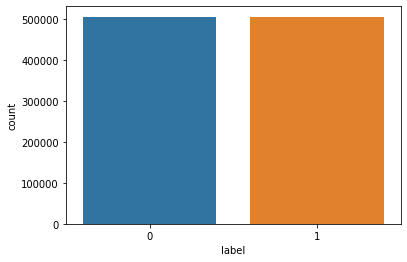

In [19]:
sns.countplot(x=train_df['label'])

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pilar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')

In [23]:
vectorizer = CountVectorizer(binary= True,
                            stop_words= english_stop_words,
                            ngram_range=(1,2))
vectorizer.fit(train_texts)


X_train_vectorizer = vectorizer.transform(train_texts)
X_test_vectorizer = vectorizer.transform(valid_texts)


In [24]:
X_train_vectorizer

<758079x2303612 sparse matrix of type '<class 'numpy.int64'>'
	with 7811149 stored elements in Compressed Sparse Row format>

In [25]:
print(X_train_vectorizer.shape)
vectorizer.vocabulary_

(758079, 2303612)


 'mom': 1290682,
 'first': 721580,
 'aired': 85300,
 'one': 1404461,
 'favorite': 696187,
 'memories': 1255461,
 'watched tng': 2183132,
 'tng mom': 2041727,
 'mom first': 1290804,
 'first aired': 721659,
 'aired one': 85316,
 'one favorite': 1406334,
 'favorite memories': 696514,
 'getting': 806225,
 'sick': 1801593,
 'shit': 1784720,
 'im getting': 974937,
 'getting sick': 808021,
 'sick shit': 1801966,
 'enjoy': 623278,
 'dont': 561035,
 'see': 1748047,
 'anything': 126834,
 'valid': 2138669,
 'post': 1530926,
 'rotation': 1695178,
 'unless': 2110731,
 'missing': 1281722,
 'something': 1845573,
 'enjoy dont': 623463,
 'dont see': 563292,
 'see anything': 1748324,
 'anything valid': 128578,
 'valid post': 2138769,
 'post rotation': 1532099,
 'rotation unless': 1695224,
 'unless im': 2111176,
 'im missing': 975602,
 'missing something': 1282067,
 'youd': 2291901,
 'look': 1171109,
 'pregnant': 1543533,
 'ate': 159729,
 'pounds': 1536110,
 'frodo': 760038,
 'youd look': 2292094,
 'look

In [26]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=[value for key, value in vectorizer.vocabulary_.items()][:10],
        y=[key for key, value in vectorizer.vocabulary_.items()][:10],
        marker=go.bar.Marker(
            color="rgb(253, 240, 54)",
            line=dict(color="rgb(0, 0, 0)",
                      width=2)
        ),
        orientation="h",
    )
)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfid = TfidfVectorizer(stop_words= english_stop_words,
                       ngram_range=(1,2))
tfid.fit(train_texts)
tfid.transform(train_texts)

<758079x2303612 sparse matrix of type '<class 'numpy.float64'>'
	with 7811149 stored elements in Compressed Sparse Row format>

In [29]:
tfid.idf_[:5]

array([10.95502526, 13.84539702, 13.84539702, 13.84539702, 13.84539702])

In [30]:
tfid.get_feature_names()[:5]

['00', '00 arrested', '00 buckshot', '00 burnley', '00 cause']

In [ ]:
train_texts[1000]

In [ ]:
#Build a Tf-Idf + logistic regression pipeline to predict sarcasm (label) 
#based on the text of a comment on Reddit (comment).
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
log_reg =  Pipeline([("tfidf", TfidfVectorizer()),
                     ("reglog",LogisticRegression())                  
                      ])

reglog_grid = {
                "tfidf__stop_words":english_stop_words,
                "tfidf__ngram_range":(1,2),
                "reglog__penalty": ["l1","l2"],
                "reglog__C": [0.1, 0.25, 0.5,0.75, 1.0]
}

model_grid = GridSearchCV(log_reg,
                          reglog_grid,
                          cv = 5,
                          scoring = 'accuracy'
                         )

In [ ]:
model_grid.fit(train_texts, y_train)
